# Лабораторная работа 4

<ol>
<li>Написать программу, которая разделяет исходную выборку на обучающую и тестовую (training set, validation set, test set), если такое разделение не предусмотрено предложенным набором данных.</li>
<li>Произвести масштабирование признаков (scaling).</li>
<li>С использованием библиотеки <a href="http://scikit-learn.org/stable/" rel="nofollow">scikit-learn</a> обучить 2 модели нейронной сети (Perceptron и MLPClassifier) по обучающей выборке. Перед обучением необходимо осуществить масштабирование признаков.
<a href="http://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html" rel="nofollow">Пример MLPClassifier</a>
Пример и описание <a href="http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html" rel="nofollow">Perceptron</a></li>
<li>Проверить точность модели по тестовой выборке.</li>
<li>Провести эксперименты и определить наилучшие параметры коэффициента обучения, параметра регуляризации, функции оптимизации.
Данные экспериментов необходимо представить в отчете (графики, ход проведения эксперимента, выводы).</li>
</ol>

## Задание 1

In [1]:
from sklearn.utils import shuffle

In [2]:
def train_test_split(x, y, train_part=0.7):
    train_size = int(x.shape[0]*train_part)
    x_, y_ = shuffle(x, y)
    
    return x_[:train_size], y_[:train_size], x_[train_size:], y_[train_size:]

## Задание 2

In [3]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

In [4]:
df = pd.read_csv('data_banknote_authentication.txt', names=['Variance', 'Skewness', 'Curtosis', 'Entropy', 'Class'])
x = df.T[:4].T
y = df.T[4:].T

x_train, y_train, x_test, y_test = train_test_split(x, y, 0.8)

In [5]:
x_train_scaler = StandardScaler()
x_train = x_train_scaler.fit_transform(x_train)

x_test_scaler = StandardScaler()
x_test = x_test_scaler.fit_transform(x_test)

## Задание 3

In [6]:
from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier

In [7]:
perc = Perceptron(tol=1e-3)
perc.fit(x_train, y_train.values.ravel())

Perceptron(alpha=0.0001, class_weight=None, eta0=1.0, fit_intercept=True,
      max_iter=1000, n_iter=None, n_jobs=1, penalty=None, random_state=0,
      shuffle=True, tol=0.001, verbose=0, warm_start=False)

In [8]:
mlp = MLPClassifier(10, max_iter=100000)
mlp.fit(x_train, y_train.values.ravel())

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=10, learning_rate='constant',
       learning_rate_init=0.001, max_iter=100000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

## Задание 4

In [9]:
from sklearn.metrics import accuracy_score

In [10]:
y_pred_perc = perc.predict(x_test)
print('Perceptron accuracy:', accuracy_score(y_pred_perc, y_test))

Perceptron accuracy: 0.985454545455


In [11]:
y_pred_mlp = mlp.predict(x_test)
print('MLP accuracy:', accuracy_score(y_pred_mlp, y_test))

MLP accuracy: 1.0


## Задание 5

In [12]:
lrs = pd.np.logspace(-3, -1, 10)
alphas = pd.np.logspace(-2, 1, 10)
optimizers = ['sgd', 'adam']
experiment_log = pd.DataFrame(columns=['Learning rate', 'L2 coefficient', 'Optimizer', 'Accuracy'])

for lr in lrs:
    for alpha in alphas:
        for optimizer in optimizers:
            print('Processing:', 'Learning rate: {}, L2 coefficient: {}, Optimizer: {}'.format(lr, alpha, optimizer))
            mlp = MLPClassifier(5, max_iter=10000, learning_rate_init=lr, alpha=alpha, solver=optimizer)
            mlp.fit(x_train, y_train.values.ravel())
            y_pred = mlp.predict(x_test)
            experiment_log = experiment_log.append({
                'Learning rate': lr,
                'L2 coefficient': alpha,
                'Optimizer': optimizer,
                'Accuracy': accuracy_score(y_pred, y_test)}, ignore_index=True)

Processing: Learning rate: 0.001, L2 coefficient: 0.01, Optimizer: sgd
Processing: Learning rate: 0.001, L2 coefficient: 0.01, Optimizer: adam
Processing: Learning rate: 0.001, L2 coefficient: 0.021544346900318832, Optimizer: sgd
Processing: Learning rate: 0.001, L2 coefficient: 0.021544346900318832, Optimizer: adam
Processing: Learning rate: 0.001, L2 coefficient: 0.046415888336127774, Optimizer: sgd
Processing: Learning rate: 0.001, L2 coefficient: 0.046415888336127774, Optimizer: adam
Processing: Learning rate: 0.001, L2 coefficient: 0.1, Optimizer: sgd
Processing: Learning rate: 0.001, L2 coefficient: 0.1, Optimizer: adam
Processing: Learning rate: 0.001, L2 coefficient: 0.21544346900318834, Optimizer: sgd
Processing: Learning rate: 0.001, L2 coefficient: 0.21544346900318834, Optimizer: adam
Processing: Learning rate: 0.001, L2 coefficient: 0.46415888336127775, Optimizer: sgd
Processing: Learning rate: 0.001, L2 coefficient: 0.46415888336127775, Optimizer: adam
Processing: Learning

Processing: Learning rate: 0.007742636826811269, L2 coefficient: 0.21544346900318834, Optimizer: adam
Processing: Learning rate: 0.007742636826811269, L2 coefficient: 0.46415888336127775, Optimizer: sgd
Processing: Learning rate: 0.007742636826811269, L2 coefficient: 0.46415888336127775, Optimizer: adam
Processing: Learning rate: 0.007742636826811269, L2 coefficient: 1.0, Optimizer: sgd
Processing: Learning rate: 0.007742636826811269, L2 coefficient: 1.0, Optimizer: adam
Processing: Learning rate: 0.007742636826811269, L2 coefficient: 2.154434690031882, Optimizer: sgd
Processing: Learning rate: 0.007742636826811269, L2 coefficient: 2.154434690031882, Optimizer: adam
Processing: Learning rate: 0.007742636826811269, L2 coefficient: 4.6415888336127775, Optimizer: sgd
Processing: Learning rate: 0.007742636826811269, L2 coefficient: 4.6415888336127775, Optimizer: adam
Processing: Learning rate: 0.007742636826811269, L2 coefficient: 10.0, Optimizer: sgd
Processing: Learning rate: 0.007742636

Processing: Learning rate: 0.05994842503189409, L2 coefficient: 10.0, Optimizer: adam
Processing: Learning rate: 0.1, L2 coefficient: 0.01, Optimizer: sgd
Processing: Learning rate: 0.1, L2 coefficient: 0.01, Optimizer: adam
Processing: Learning rate: 0.1, L2 coefficient: 0.021544346900318832, Optimizer: sgd
Processing: Learning rate: 0.1, L2 coefficient: 0.021544346900318832, Optimizer: adam
Processing: Learning rate: 0.1, L2 coefficient: 0.046415888336127774, Optimizer: sgd
Processing: Learning rate: 0.1, L2 coefficient: 0.046415888336127774, Optimizer: adam
Processing: Learning rate: 0.1, L2 coefficient: 0.1, Optimizer: sgd
Processing: Learning rate: 0.1, L2 coefficient: 0.1, Optimizer: adam
Processing: Learning rate: 0.1, L2 coefficient: 0.21544346900318834, Optimizer: sgd
Processing: Learning rate: 0.1, L2 coefficient: 0.21544346900318834, Optimizer: adam
Processing: Learning rate: 0.1, L2 coefficient: 0.46415888336127775, Optimizer: sgd
Processing: Learning rate: 0.1, L2 coeffici

In [13]:
experiment_log = experiment_log.sort_values(['Accuracy', 'Learning rate', 'L2 coefficient', 'Optimizer'])
experiment_log

,Learning rate,L2 coefficient,Optimizer,Accuracy
16,0.001000,4.641589,sgd,0.974545
19,0.001000,10.000000,adam,0.974545
18,0.001000,10.000000,sgd,0.974545
39,0.001668,10.000000,adam,0.974545
38,0.001668,10.000000,sgd,0.974545
59,0.002783,10.000000,adam,0.974545
58,0.002783,10.000000,sgd,0.974545
79,0.004642,10.000000,adam,0.974545
78,0.004642,10.000000,sgd,0.974545
99,0.007743,10.000000,adam,0.974545


In [14]:
from matplotlib import pyplot as plt

,Learning rate,L2 coefficient,Optimizer,Accuracy
180,0.1,0.010000,sgd,0.985455
182,0.1,0.021544,sgd,0.989091
184,0.1,0.046416,sgd,1.000000
186,0.1,0.100000,sgd,0.989091
188,0.1,0.215443,sgd,1.000000
190,0.1,0.464159,sgd,1.000000
192,0.1,1.000000,sgd,1.000000
194,0.1,2.154435,sgd,0.989091
196,0.1,4.641589,sgd,0.978182
198,0.1,10.000000,sgd,0.974545


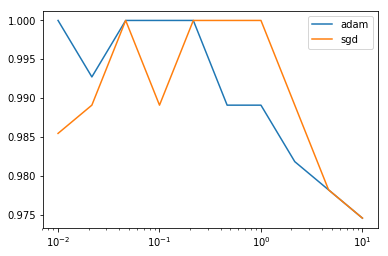

In [19]:
ax = plt.subplot()

sub_df = experiment_log[(experiment_log['Learning rate'] == 0.1) & (experiment_log['Optimizer'] == 'adam')].sort_values(['L2 coefficient'])
plt.plot(sub_df.values.T[1,:].T, sub_df.values.T[3,:].T, label='adam')

sub_df = experiment_log[(experiment_log['Learning rate'] == 0.1) & (experiment_log['Optimizer'] == 'sgd')].sort_values(['L2 coefficient'])
plt.plot(sub_df.values.T[1,:].T, sub_df.values.T[3,:].T, label='sgd')

ax.set_xscale('log')
plt.legend()

sub_df

,Learning rate,L2 coefficient,Optimizer,Accuracy
6,0.001000,0.1,sgd,0.985455
26,0.001668,0.1,sgd,0.985455
46,0.002783,0.1,sgd,0.985455
66,0.004642,0.1,sgd,0.989091
86,0.007743,0.1,sgd,1.000000
106,0.012915,0.1,sgd,0.996364
126,0.021544,0.1,sgd,0.989091
146,0.035938,0.1,sgd,0.996364
166,0.059948,0.1,sgd,1.000000
186,0.100000,0.1,sgd,0.989091


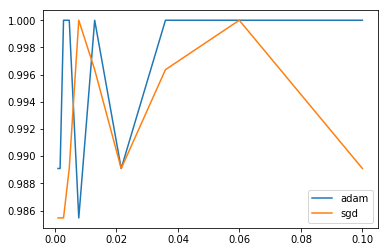

In [20]:
ax = plt.subplot()

sub_df = experiment_log[(experiment_log['L2 coefficient'] == 0.1) & (experiment_log['Optimizer'] == 'adam')].sort_values(['Learning rate'])
plt.plot(sub_df.values.T[0,:].T, sub_df.values.T[3,:].T, label='adam')

sub_df = experiment_log[(experiment_log['L2 coefficient'] == 0.1) & (experiment_log['Optimizer'] == 'sgd')].sort_values(['Learning rate'])
plt.plot(sub_df.values.T[0,:].T, sub_df.values.T[3,:].T, label='sgd')

plt.legend()

sub_df